<a href="https://colab.research.google.com/github/jspinaj/Computer-Vision/blob/main/Pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Jupyter Notebook


In [ ]:
# Setup 
#pip uninstall opencv-python
# pip install opencv-contrib-python
import numpy as np
import random
import pandas as pd
import os

import cv2
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



In [ ]:
def extraccion_ROI(imagen):
    ima=imagen.copy()
    ima=cv2.cvtColor(ima,cv2.COLOR_BGR2RGB) 
    ima_umb=umbral_hsv_rojo(ima)
    ima_llenado=llenado(ima_umb)
    ima_erosion=erosion(ima_llenado,18,18,10,"elipse")
    ima_apertura=apertura(ima_erosion,10,10,"elipse")
    ima_dilatacion=dilatacion(ima_apertura,20,20,10,"elipse")
    ima_final=cv2.bitwise_and(ima,ima,mask=ima_dilatacion)
    ima_bw=cv2.cvtColor(ima_final,cv2.COLOR_BGR2GRAY)
    #ret,th1 = cv2.threshold(ima_bw,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    ret,th1 = cv2.threshold(ima_bw,100,255,cv2.THRESH_BINARY)
    return  th1, ima_bw





def umbral_hsv_rojo(imagen):
    redBajo1 = np.array([0,85,10],np.uint8) 
    redAlto1 = np.array([8,255,255],np.uint8)
    redBajo2 = np.array([165,85,10],np.uint8) 
    redAlto2 = np.array([180,255,255],np.uint8) 
    img_hsv = cv2.cvtColor(imagen,cv2.COLOR_RGB2HSV)
    maskRed1 = cv2.inRange(img_hsv, redBajo1, redAlto1)
    maskRed2 = cv2.inRange(img_hsv, redBajo2, redAlto2)
    maskRed = cv2.add(maskRed1,maskRed2)
    
    return maskRed

def llenado(imagen):
    
    im_floodfill = imagen.copy()
    h, w = imagen.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (0,0), 255);

     # Invert floodfilled image

    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.

    im_out = imagen | im_floodfill_inv
    return im_out

def erosion(imagen,a,b,n,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima=imagen.copy()
    for i in range(1,n):
        ima= cv2.erode(ima,kernel)
    return ima

def dilatacion(imagen,a,b,n,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima=imagen.copy()
    for i in range(1,n):
        ima= cv2.dilate(ima,kernel,n)
    return ima

def apertura(imagen,a,b,tipo):
    if tipo=="rect":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(a,b))
    elif tipo=="elipse":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(a,b))
    elif tipo=="cruz":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(a,b))
    else:
        print("tipo de elemento estructurante invalido")
        return imagen
    ima= cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel)
    return ima



In [ ]:
# Functions

def pre_processing(img_og):

    img_processed = cv2.cvtColor(img_og, cv2.COLOR_BGR2GRAY)

    return img_processed

def segmentation(img_processed,img_category):
    [n,img_BW]=cv2.threshold(img_processed,127,255,cv2.THRESH_BINARY)
    
    
    #edges = cv2.Canny(img_processed,e,f)
    
    #Detección del contorno
    #contours, hierarchy = cv2.findContours(edges , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
    
    #Visualización de los contornos
    #cv2.drawContours (img_processed, contours, -1, (0, 255, 0), 3) 
    
    segment=img_processed

    # extract segment
    prop1=random.randrange(0,300, 1)
    prop2=random.randint(1,100)
    
    prop3=random.randrange(-15,100, 1)
    properties=  [img_filename, img_category, prop1, prop2, prop3] 
    
    return img_BW,properties
             
def img_plot (img_og,img_processed,img_BW,filename_out):
   
    # process for image showing
    img_processed=cv2.cvtColor(img_processed, cv2.COLOR_GRAY2RGB)           # change from gayscale NxMx1 to color NxMx3
    img_BW=cv2.cvtColor(img_BW, cv2.COLOR_GRAY2RGB)           # change from gayscale NxMx1 to color NxMx3

    img_out=np.hstack((img_og,img_processed,img_BW ))                 # stich together images    

    #plt.subplot(2, 3, 1), plt.imshow(img_og, 'gray')
    #plt.subplot(2, 3, 2), plt.imshow(img_processed, 'gray')
    #plt.subplot(2, 3, 3), plt.imshow(img_BW, 'gray')
    #plt.subplot(2, 1, 2), plt.imshow(img_out, 'gray')

    #plt.savefig(filename_out) # To save figure

    #plt.show() # To show figure

    cv2.imwrite(filename_out,img_out)
    #print(filename_out)


In [ ]:
img_filename="data/traffic_signs/Ceda_el_Paso/Cedapaso2.jpg"
img_og=cv2.imread(img_filename)     #original image  
img_og=cv2.cvtColor(img_og,cv2.COLOR_BGR2RGB) 
print(img_filename)

words = img_filename.split("/")
img_category=words[2]   
filename_out="data/output/"+words[3]


img_processed=pre_processing(img_og)
[img_BW,properties]=segmentation(img_processed,img_category)

[img_BW,img_processed]=extraccion_ROI(img_og)

img_plot(img_og,img_processed,img_BW,filename_out)


In [ ]:
# image ingest

image_list = open("data/traffic_filename_list.txt", "r")  
data=[]
properties=[]
random.seed(10)

for img_filename in image_list:
    img_filename=img_filename.replace("\n","")
    img_og=cv2.imread(img_filename)     #original image   
    
    
    print(img_filename)

    words = img_filename.split("/")
    img_category=words[2]   
#    filename_out="data/output/"+words[3]
    filename_out= "G:/Unidades compartidas/TIA 2021-II/Imagenes/output/"+words[3]

    
    img_processed=pre_processing(img_og)
    [img_BW,properties]=segmentation(img_processed,img_category)
    
    [img_BW,img_processed]=extraccion_ROI(img_og)

    img_plot(img_og,img_processed,img_BW,filename_out)

    data.append(properties)


# images properties dataframe
col_names=['img_filename','category','prop1', 'prop2', 'prop3']
df=pd.DataFrame(data, columns = col_names)

csv_filename="data/properties.csv"
df.to_csv(csv_filename)             # guardar datos a archivo csv



#print(df2)

In [ ]:

img_filename="data/Prohibidoparq_ideal.png"

img_ideal=cv2.imread(img_filename) 
img_og=cv2.imread("data/traffic_signs/Prohibido_Parquear/Prohibidoparq13.jpg")

vector_size=15
#alg= cv2.SIFT_create()
alg = cv2.AKAZE_create()

kp1, des1 = alg.detectAndCompute(img_ideal,None)
kp2, des2 = alg.detectAndCompute(img_og,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

print(type(des1))

print(type(des2))

# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
print(matches[1])


list_x = []
list_y = []

# For each match...
for mat in matches:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1, y1) = kp1[img1_idx].pt
    (x2, y2) = kp2[img2_idx].pt

    # Append to each list
    list_x.append(x2)
    list_y.append(y2)



img3 = cv2.drawMatches(img_ideal,kp1,img_og,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#cv2.drawContours(img_og,list_kp2, -1, (0, 255, 0), 3)
start_point = (int(min(list_x)),int(min(list_y)))
end_point = (int(max(list_x)),int(max(list_y)))
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 10
print(start_point)
cv2.rectangle(img_og,start_point, end_point,color,thickness  )
for i in range(len(list_x)):
    cv2.circle(img_og,(int(list_x[i]),int(list_y[i])),60,color,-1)
cv2.imwrite('data/out.jpg',img_og)
plt.imshow(img_og),plt.show()


In [ ]:
img_filename="data/traffic_signs/Prohibido_Parquear/Prohibidoparq29.jpg"
img_og=cv2.imread(img_filename)     #original image





In [ ]:
img_filename="data/traffic_signs/Prohibido_Parquear/Prohibidoparq29.jpg"

words[0]

words[3]
var=
var

In [ ]:
# Properties Analysis
csv_filename="data/properties.csv"
df=pd.read_csv(csv_filename )      # leer archivo csv para probar

features=df[['prop1','prop2','prop3']]          # separando las propiedades del dataframe
corr_coef = features.corr()                     # coeficiente estadistico

mu=features.mean()                              # media de cada propiedad
sigma=features.var()                            # vector de varianzas  

#print(corr_coef)

# Normalization 
features=(features-mu)/sigma

# Perform PCA analysis
# dos formas de hacer PCA
pca = PCA(n_components=features.shape[1])       # 1. definiendo cantidad de componentes
pca=PCA(0.8)                                    # 2. por grado semejanza
pca.fit(features)                               # aplicación 
print(pca.components_)
print("explained_varianc_ratio " + str(pca.explained_variance_ratio_))

reduced_features=pca.transform(features)     

df['pca1']=reduced_features[:,0]

df['pca2']=reduced_features[:,1]
#print(reduced_features[:,1])
#print(reduced_features)


In [ ]:
categories= df['category']
categories=categories.unique()

print(categories)

df_cla = [x for _, x in df.groupby('category')]
print(df)


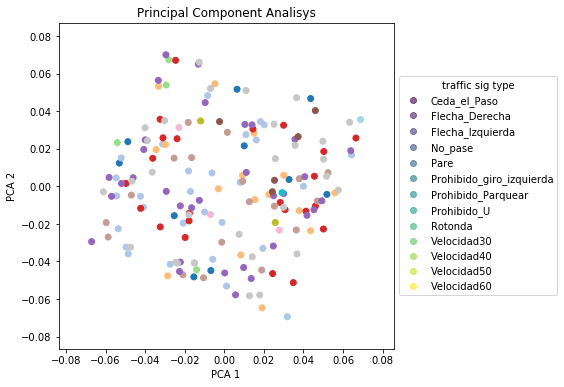

In [112]:



#dfC1, dfC2 = [x for _, x in df.groupby('category')]


fig, ax = plt.subplots(figsize=(6, 6))
scattter=plt.scatter(df.pca1, df.pca2, c = pd.Categorical(df.category).codes, cmap='tab20')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Principal Component Analisys')

handles, labels = scatter.legend_elements(prop='colors',num=12, alpha=0.6)


ax.legend(handles, categories,loc='center left', bbox_to_anchor=(1, 0.5),title='traffic sig type')

#plt.show()
